<a href="https://colab.research.google.com/github/argennof/Data_A-V_2022/blob/main/Pr%C3%A1ctico_NoSupervisado_fifa2022_G24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [41]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

# import mglearn




In [43]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.preprocessing  import scale


from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [44]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns


## 2.- Limpieza y Exploración de la base de datos FIFA 22

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa22). [Enlace](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset)  como 'data.csv'.** 

In [45]:
url='https://github.com/Grupo242022/AN_Supervisado_2022/blob/main/players_22.csv?raw=true'
df=pd.read_csv(url, sep=',')



- Damos una mirada rápida al conjunto de datos:

In [46]:
df = pd.read_csv(url)
df.tail(3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,72,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,31.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,175000.0,NaN,NaN,60.0,37.0,45.0,49.0,41.0,52.0,39,32,43,49,37,47,37,...,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,NaN,45+2,45+2,45+2,46,46,46,46,46,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,66,111131.0,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,12.0,NaN,2021-06-18,2021.0,25,Republic of Ireland,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,239000.0,NaN,NaN,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,...,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,NaN,47+2,47+2,47+2,47,47,47,47,47,45+2,45+2,45+2,45+2,39+2,39+2,39+2,45+2,33+2,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19238,264540,https://sofifa.com/player/264540/emanuel-lalch...,E. Lalchhanchhuaha,Emanuel Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,2002-02-06,167,61,113040.0,NorthEast United FC,Indian Super League,1.0,SUB,13.0,NaN,2021-08-31,2025.0,159,India,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-),No,217000.0,NaN,NaN,68.0,38.0,45.0,48.0,36.0,48.0,39,32,46,50,37,48,38,...,57,40,36,55,42,47,46,35,36,33,31,37,8,13,13,9,14,NaN,45+2,45+2,45+2,47,47,47,47,47,47+2,47+2,47+2,48+2,46+2,46+2,46+2,48+2,45+2,44+2,44+2,44+2,45+2,45+2,41+2,41+2,41+2,45+2,16+2,https://cdn.sofifa.net/players/264/540/22_120.png,https://cdn.sofifa.net/teams/113040/60.png,https://cdn.sofifa.net/flags/in.png,NaN,https://cdn.sofifa.net/flags/in.png


- Determinamos el numero de filas y columnas del conjunto de dato. A su vez tomamos de muestra la columna de posicion de jugador y observamos su contenido... 


In [47]:
print(df.columns)
print(len(df.columns), 'variables') # 110 variables

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
110 variables


In [48]:
df.player_positions.loc[:10,]

0     RW, ST, CF
1             ST
2         ST, LW
3        LW, CAM
4        CM, CAM
5             GK
6         ST, LW
7             GK
8             GK
9             ST
10       CDM, CM
Name: player_positions, dtype: object

#1 - Análisis exploratorio:

 Basandonos en el codigo de [Unal Koroglu - Kaggle](https://www.kaggle.com/code/nalkrolu/fifa-19-complete-player-dataset-analysis), visualizaremos el comportamiento de la base de datos / tipo de jugadores:

In [49]:
# Tipo de jugador - atributos dentro de la variable posicion de jugador:
DEFENDING = ["CB","LB","LCB","LWB","RB","RCB","RWB"]
MIDFIELD = ["CAM","CDM","CM","LAM","LCM","LDM","LM","RAM","RCM","RDM","RM"]
ATTACKING = ["CF","LF","RF","RS","RW","LW","LS","ST"]
GOALKEEPER = ["GK"]

# almacenando estos en un listado
main = []

for i in df["player_positions"]:
    if set(i.split(',')).intersection(DEFENDING):
        main.append("Defensa")
        
    elif set(i.split(',')).intersection(MIDFIELD):
        main.append("Medio campista")
    elif set(i.split(',')).intersection(ATTACKING):
        main.append("Atacante")
    elif set(i.split(',')).intersection(GOALKEEPER):
        main.append("Arquero")
    else:
        main.append(np.nan)

# Incorporando en el conjunto de datos               
df["Main_Position"] = main

In [50]:
df.loc[:10,['short_name','Main_Position', 'player_positions']]

,short_name,Main_Position,player_positions
0,L. Messi,Atacante,"RW, ST, CF"
1,R. Lewandowski,Atacante,ST
2,Cristiano Ronaldo,Atacante,"ST, LW"
3,Neymar Jr,Atacante,"LW, CAM"
4,K. De Bruyne,Medio campista,"CM, CAM"
5,J. Oblak,Arquero,GK
6,K. Mbappé,Atacante,"ST, LW"
7,M. Neuer,Arquero,GK
8,M. ter Stegen,Arquero,GK
9,H. Kane,Atacante,ST


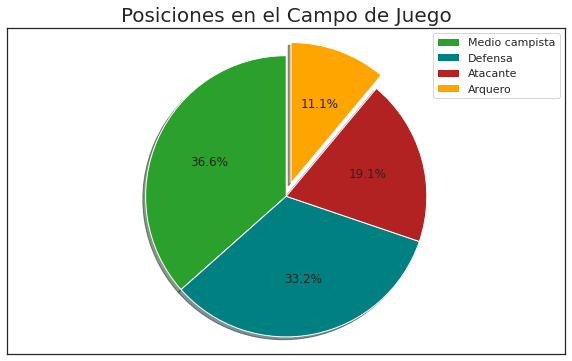

In [51]:
labels  = df["Main_Position"].value_counts().index
sizes   = df["Main_Position"].value_counts().values
explode = (0,0,0,0.1)
plt.figure(figsize=(10,6))
plt.pie(x=sizes,explode=explode,autopct='%1.1f%%',shadow=True, 
        startangle=90, frame=True,colors=["tab:green","teal","firebrick","orange"])
plt.axis('equal')
plt.legend(labels)
plt.title("Posiciones en el Campo de Juego",fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

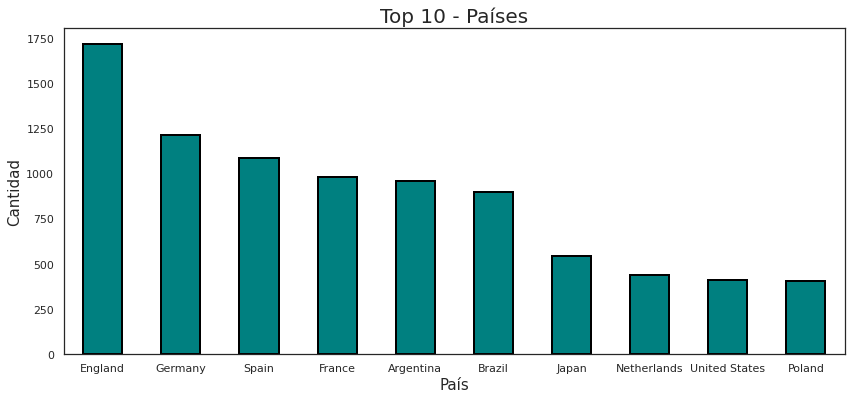

In [52]:
plt.figure(figsize=(14,6))

df["nationality_name"].value_counts()[:10].plot(kind="bar",color="teal",lw=2,edgecolor="black")
plt.xticks(rotation=0)
plt.xlabel("País",fontsize=15)
plt.ylabel("Cantidad",fontsize=15)
plt.title("Top 10 - Países",fontsize=20)
plt.show()

- De la Base de datos la mayoría son medio campistas y el país con mayor presencia de jugadores es Inglaterra.

### Seleccionamos las variables por tipo
    1 - Objeto 
    2- Numericas



In [53]:
# tipo objeto:
s = df.select_dtypes(include = ['object'])
print(len(s.columns), 'variables')
print(f'variables texto: {s.columns}')

51 variables
variables texto: Index(['player_url', 'short_name', 'long_name', 'player_positions', 'dob',
       'club_name', 'league_name', 'club_position', 'club_loaned_from',
       'club_joined', 'nationality_name', 'nation_position', 'preferred_foot',
       'work_rate', 'body_type', 'real_face', 'player_tags', 'player_traits',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'Main_Position'],
      dtype='object')


In [54]:
# Tipo numericas - habilidades:
h_num = df.select_dtypes(include = np.number, exclude = float)
print(len(h_num.columns), 'variables')
print(f'variables numericas: {h_num.columns}')


44 variables
variables numericas: Index(['sofifa_id', 'overall', 'potential', 'age', 'height_cm', 'weight_kg',
       'nationality_id', 'weak_foot', 'skill_moves',
       'international_reputation', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',

### Limpieza de la Base de datos para aplicar las técnicas de Clustering:

- Retiramos jugadores con bajo Desempeño global ("Overall") y consideramos Variables de desempeño por habilidad (skills_ratings)

In [55]:
df2= pd.DataFrame()
df2[['short_name','Main_Position']]=s[['short_name','Main_Position']]
skills_ratings = ['overall','skill_moves',
                  'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking_awareness',
                  'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                  'goalkeeping_positioning', 'goalkeeping_reflexes'
                 ]
df2[skills_ratings]=h_num[skills_ratings]



In [56]:
df2=df2[(df2['overall']>75)].loc[:10000] # los primeros jugadores que superen el overall 75

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1463
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   short_name                   1464 non-null   object
 1   Main_Position                1464 non-null   object
 2   overall                      1464 non-null   int64 
 3   skill_moves                  1464 non-null   int64 
 4   attacking_crossing           1464 non-null   int64 
 5   attacking_finishing          1464 non-null   int64 
 6   attacking_heading_accuracy   1464 non-null   int64 
 7   attacking_short_passing      1464 non-null   int64 
 8   attacking_volleys            1464 non-null   int64 
 9   skill_dribbling              1464 non-null   int64 
 10  skill_curve                  1464 non-null   int64 
 11  skill_fk_accuracy            1464 non-null   int64 
 12  skill_long_passing           1464 non-null   int64 
 13  skill_ball_control           1464

## - Las anteriores las analizamos por medio de diagramas de cajas:

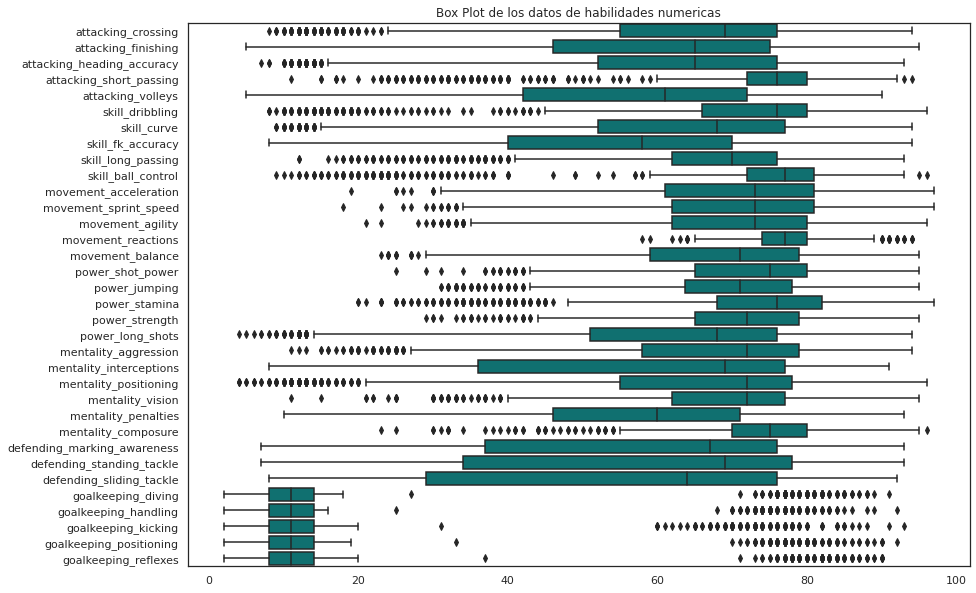

In [58]:
plt.figure(figsize=(14,10))
sns.boxplot(data=df2.iloc[:,4:], orient="h", palette=["teal"])
plt.title("Box Plot de los datos de habilidades numericas")
plt.show()

# 2- Evaluación visual e intuitiva de a dos variables a la vez.

Visualizamos los datos de a dos variables numéricas

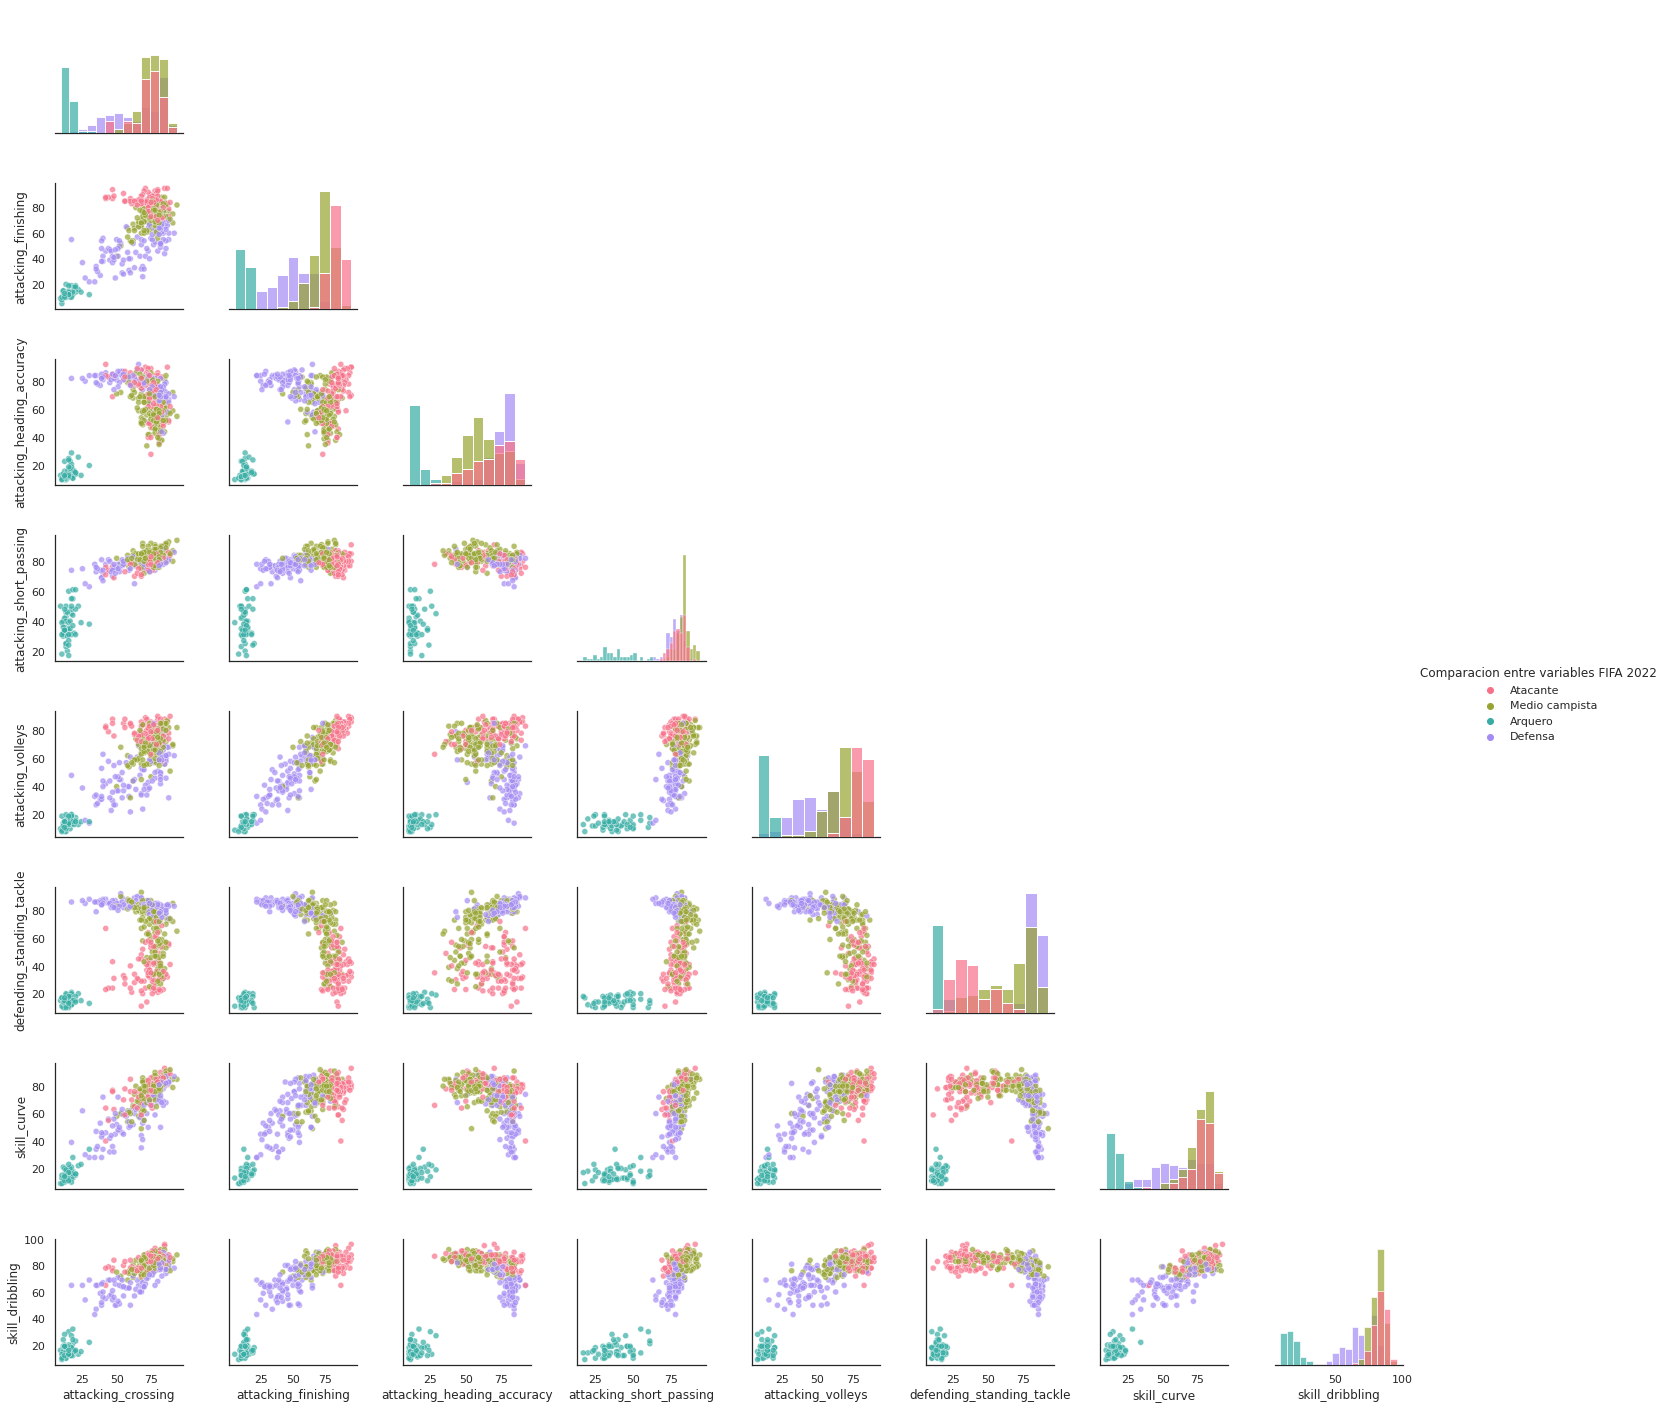

In [59]:
bool_crack=df2["overall"] > 80 # mejores jugadores
# excluimos del conjunto de datos
exclude=['short_name','overall','skill_moves','skill_fk_accuracy', 'skill_long_passing', 
         'skill_ball_control','movement_acceleration', 'movement_sprint_speed', 'movement_agility',
         'movement_reactions', 'movement_balance', 'power_shot_power','power_jumping', 
         'power_stamina', 'power_strength', 'power_long_shots','mentality_aggression',
         'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties',
         'mentality_composure', 'defending_marking_awareness','goalkeeping_kicking',
         'defending_sliding_tackle','goalkeeping_diving', 'goalkeeping_handling', 
         'goalkeeping_positioning', 'goalkeeping_reflexes'] 

# graficamos las variables restantes en formato de histograma y dispersion
# - hacemos uso de la var: Posicion principal:         
grids = sns.PairGrid(df2.loc[bool_crack, df2.columns.difference(exclude)],
                     hue='Main_Position', corner=True, palette='husl')
grids.map_diag(sns.histplot, alpha = 0.7)
grids.map_lower(sns.scatterplot, alpha = 0.7)
grids.add_legend(title="Comparacion entre variables FIFA 2022", adjust_subtitles=True)

# Ampliamos usando a las variables:


*  **Entrada Limpia (defending_standing_tackle/ [def - dispo](https://www.todoultimateteam.com/guia-de-atributos-fifa-ultimate-team/)):** Capacidad de lograr exitosamente una entrada defensiva, utilizando el cuerpo y quitando el balón sin que el defensor se deslice por el suelo.
*   **Curva (skill_curve):** Afecta pases, tiros y centros. Por ejemplo, la forma en que el jugador realiza pases evitando a un rival que obstruya el pase.







In [60]:
bool_crack=df2["overall"] > 80 # mejores jugadores
skill_1= 'defending_standing_tackle'
skill_2= 'skill_curve'

graf1=go.Scatter(x=df2[skill_1], y=df2[skill_2],
                   mode='markers',text=df.loc[:,'Main_Position'], 
                   marker=dict(size=5))

crack=go.Scatter(x=df2.loc[bool_crack,skill_1], y=df2.loc[bool_crack,skill_2],
                 name='Top players',text=df2.loc[bool_crack,'short_name'],
                 textfont=dict(family='sans serif',size=10,color='black'),
                 opacity=0.9,mode='text')
data=[graf1,crack]

layout = go.Layout(title="Visualización de defending_standing_tackle vs skill_curve",
                   titlefont=dict(size=20),xaxis=dict(title=skill_1),yaxis=dict(title=skill_2),
                   autosize=False, width=700,height=700)
fig = go.Figure(data=data, layout=layout)

#En Colab
fig.show(renderer="colab")

# Conclusion
- En general se puede observar que los arqueros se separan claramente del resto de los jugadores. Esto se puede deber a las habilidades tecnicas requeridas, asi como su comportamiento en la cancha los hace jugadores muy especificos.

# 3- Uso de técnicas de clustering

## K-Medias:
- **Es necesario** definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo.

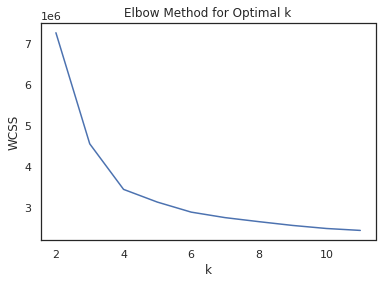

In [61]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
df_clust= df2.copy()

# Elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_clust.select_dtypes(include=np.number,
                                                          exclude = float).values).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k');

Al analizar el grafico anterior podemos inferir que la cantidad adecuada de cluster es 4 y de ahí en adelante el modelo no presenta una mejora significativa. Para esta parte del ejercicio no usamos los datos normalizados.

In [62]:
# Definicion del modelo

n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_clust.select_dtypes(include = np.number, exclude = float).values) #utiliza todas las habilidades: 34 dimensiones

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  3456129.8455280378


Pasaremos entonces a visualizar dos variables y veremos el agrupamiento:

In [63]:
bool_crack=df_clust["overall"] > 85
bool_no_crack=df_clust["overall"]<86

# Habilidades seleccionadas
skill_1= 'defending_standing_tackle'
skill_2= 'attacking_finishing'

In [64]:

kmean_clusters = go.Scatter(x=df_clust[skill_1], y=df_clust[skill_2],
                           mode='markers',
                        text=df_clust.loc[:,'Main_Position'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), 
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_clust.loc[bool_crack,skill_1], y=df_clust.loc[bool_crack,skill_2],name='Cracks!!',
                      text=df_clust.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [65]:
#En Colab
fig.show(renderer="colab")

In [66]:
df_clus_KM_sn=df_clust.copy()
df_clus_KM_sn['kmeans'] = km.labels_ #clusters
df_clus_KM_sn[['Main_Position','short_name']]=df2[['Main_Position','short_name']]
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


In [67]:
# Identificamos 5 jugadores por km_labels, asi como sus posiciones en la cancha:
for cluster in df_clus_KM_sn['kmeans'].unique():
    print(f"Num Cluster - Kmeans - sin normalizar: {cluster} \n {'-'*90}\n",
          f"Jugadores: {df_clus_KM_sn[df_clus_KM_sn['kmeans']==cluster]['short_name'].values[:5]}\n {'-'*90}\n",
          f"Posición en la cancha: {df_clus_KM_sn[df_clus_KM_sn['kmeans']==cluster]['Main_Position'].values[:5]}\n {'-'*90}\n"       
          ) 

Num Cluster - Kmeans - sin normalizar: 2 
 ------------------------------------------------------------------------------------------
 Jugadores: ['L. Messi' 'R. Lewandowski' 'Cristiano Ronaldo' 'Neymar Jr' 'K. Mbappé']
 ------------------------------------------------------------------------------------------
 Posición en la cancha: ['Atacante' 'Atacante' 'Atacante' 'Atacante' 'Atacante']
 ------------------------------------------------------------------------------------------

Num Cluster - Kmeans - sin normalizar: 3 
 ------------------------------------------------------------------------------------------
 Jugadores: ['K. De Bruyne' 'N. Kanté' 'Casemiro' 'J. Kimmich' 'Sergio Ramos']
 ------------------------------------------------------------------------------------------
 Posición en la cancha: ['Medio campista' 'Medio campista' 'Medio campista' 'Medio campista'
 'Defensa']
 ------------------------------------------------------------------------------------------

Num Cluster

# PCA & K-Means
 - Reducimos ahora la dimensionalidad con PCA.

In [68]:

bool_crack=df_clust["overall"] > 85
bool_no_crack=df_clust["overall"]<86

x = df2.select_dtypes(include = np.number, exclude = float).values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
df_train = X_norm.copy()
df_train.set_axis(df2.select_dtypes(include = np.number, exclude = float).columns, 
                    axis='columns', inplace=True) 


pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_train)


In [69]:
pca.explained_variance_ratio_

array([0.57438837, 0.20132598])

In [70]:
exp_var = [round(i, 1) for i in pca.explained_variance_ratio_ * 100]

In [71]:
exp_var

[57.4, 20.1]

- Aplicamos silhouette, como estrategia para analizar los clusters resultantes.

For n_clusters =  2  Average score:  0.628562412084982
For n_clusters =  3  Average score:  0.34601129686083226
For n_clusters =  4  Average score:  0.31898900211594067
For n_clusters =  5  Average score:  0.28523853616581396
For n_clusters =  6  Average score:  0.23003186465163344
For n_clusters =  7  Average score:  0.22550471359352364
For n_clusters =  8  Average score:  0.22400178684698835
For n_clusters =  9  Average score:  0.21482687465952124
For n_clusters =  10  Average score:  0.20151989940160916
For n_clusters =  11  Average score:  0.19437303753846075


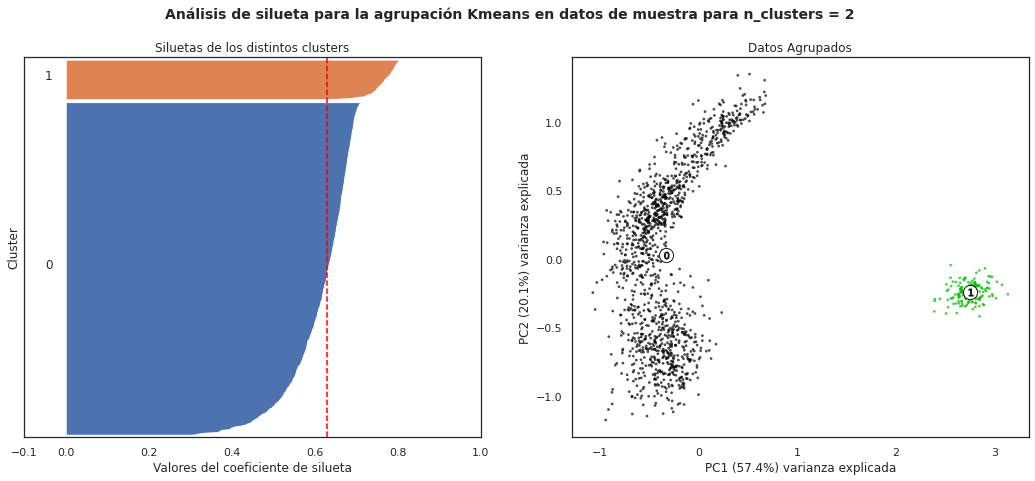

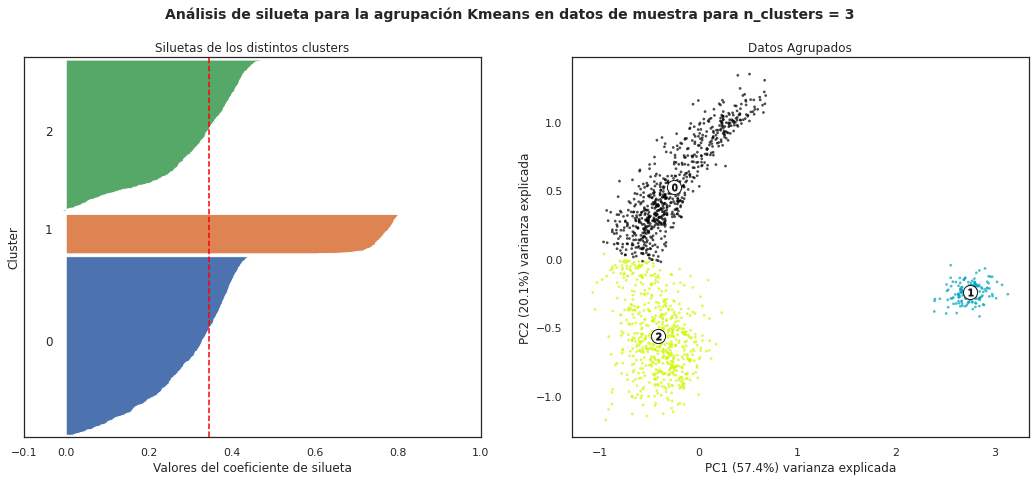

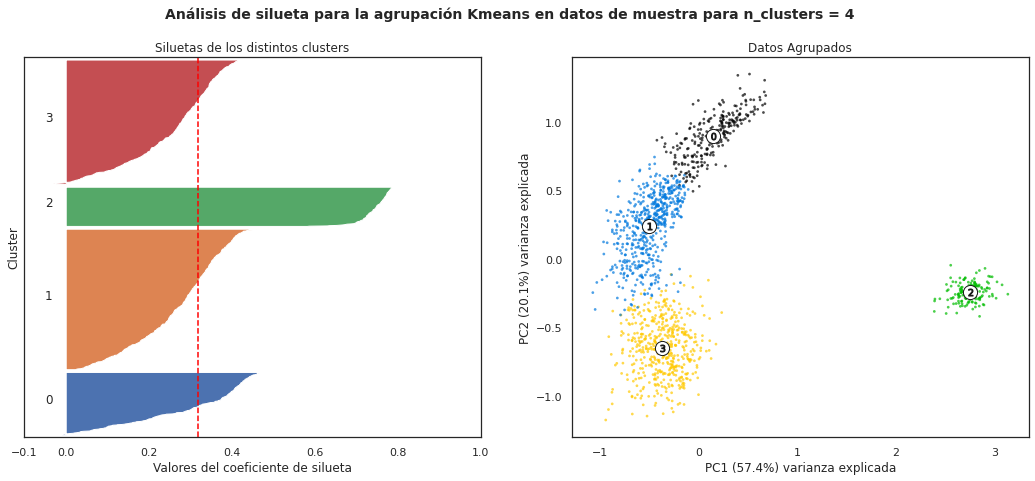

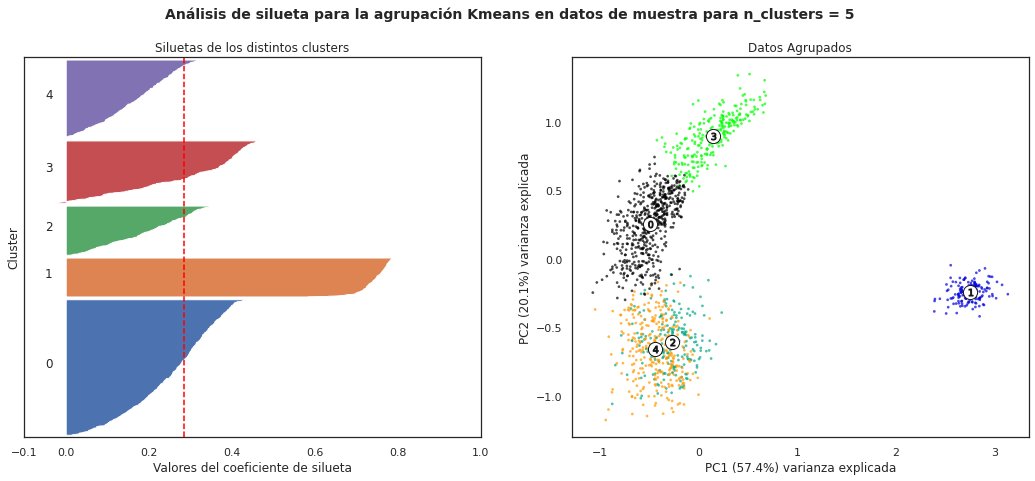

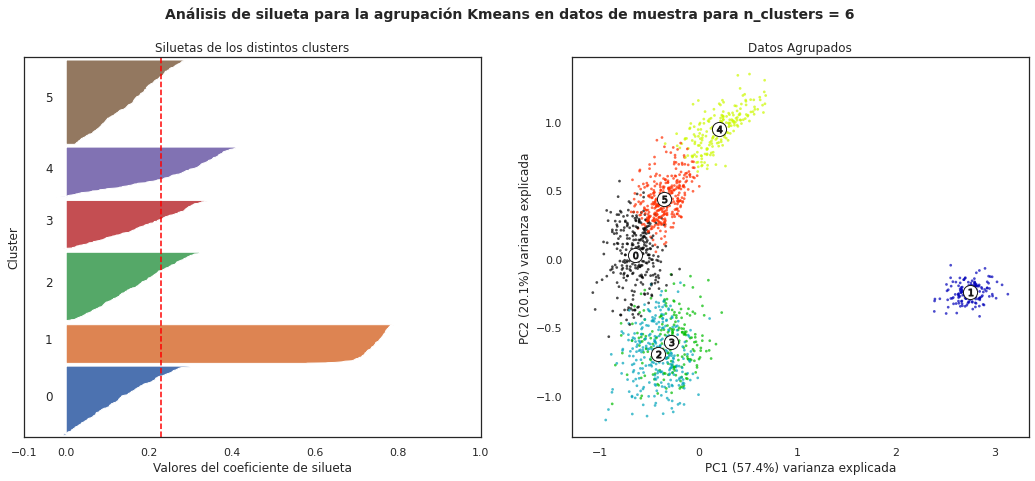

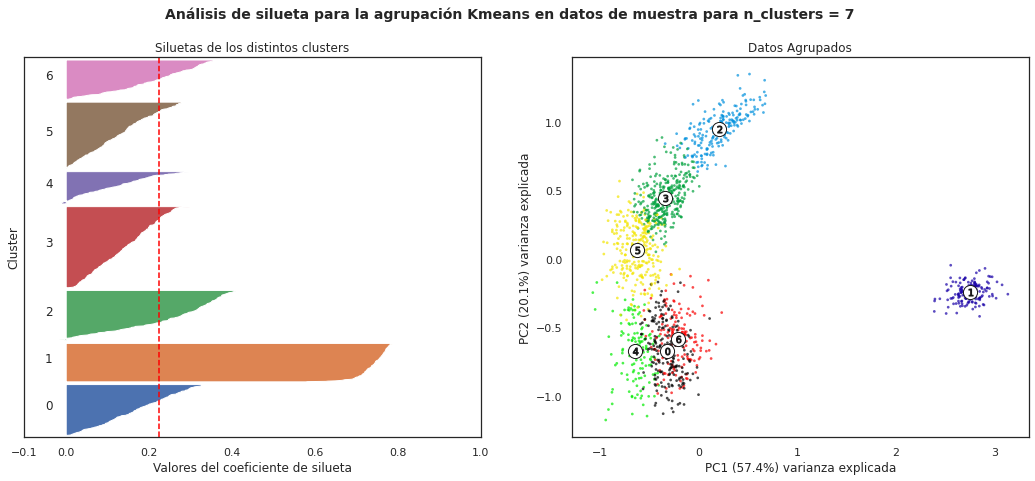

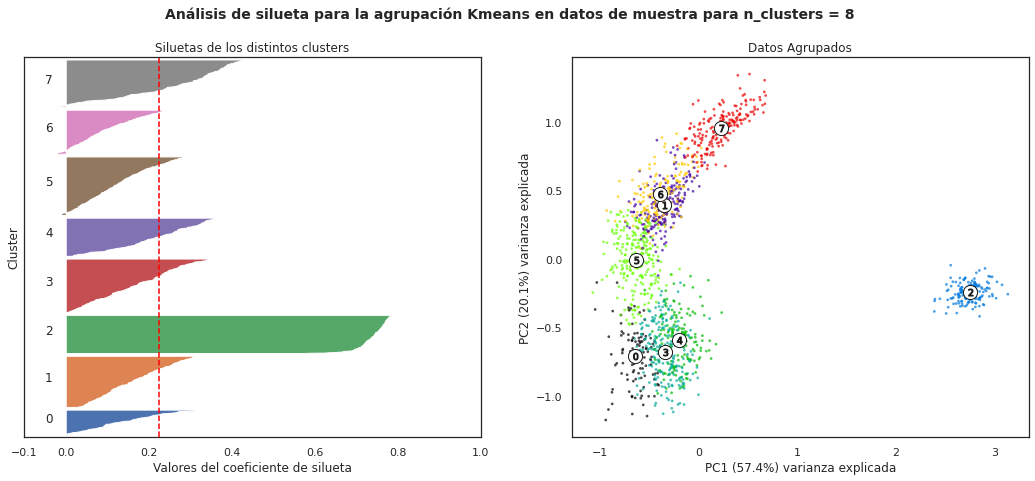

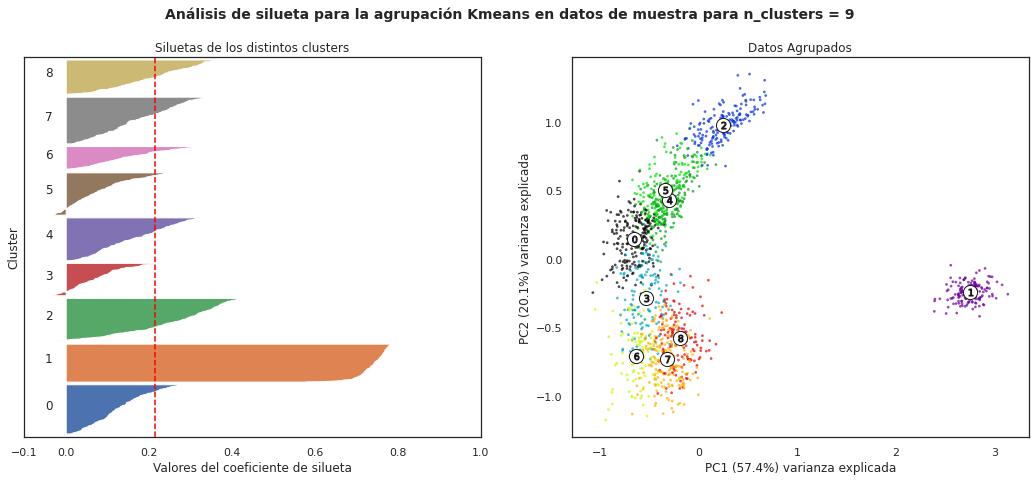

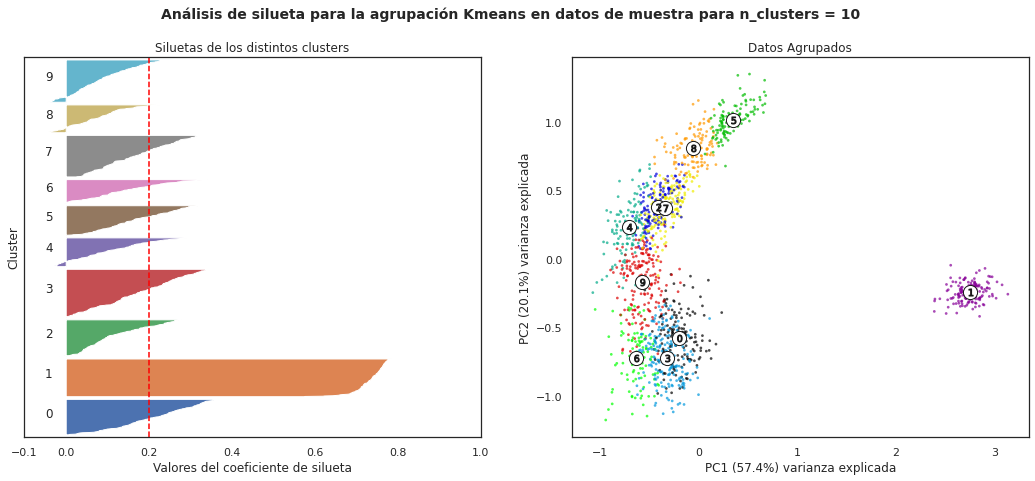

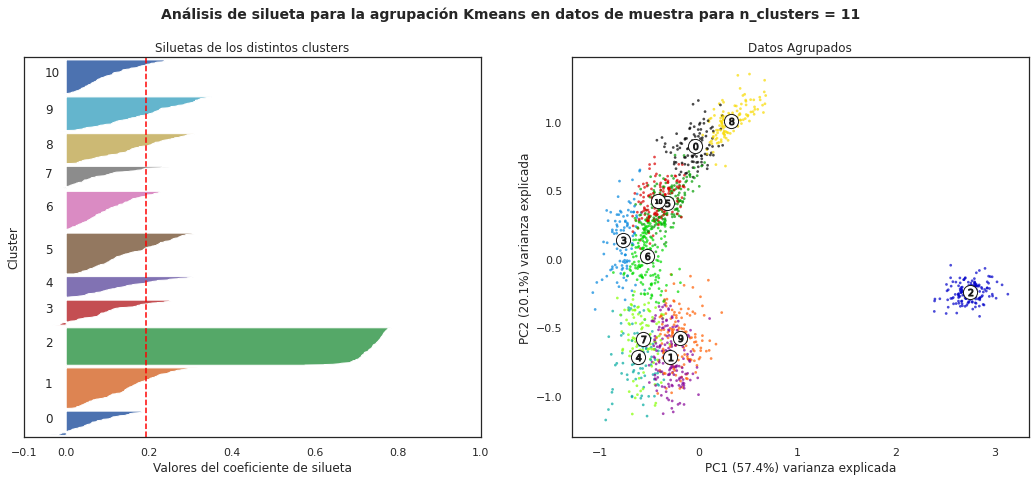

In [72]:


range_n_clusters = range(2, 12)

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_train) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_train)

    silhouette_avg = silhouette_score(df_train, cluster_labels)
    print("For n_clusters = ", n_clusters, " Average score: ", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]

      y_upper = y_lower + size_cluster_i

      ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

    ax1.set_title("Siluetas de los distintos clusters")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Cluster")   
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    centers = pca.transform(centers)
    ax2.scatter(centers[:, 0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, s=50, edgecolor='k')

    ax2.set_title("Datos Agrupados")
    ax2.set_xlabel('PC1 (' + str(exp_var[0]) + '%) varianza explicada')
    ax2.set_ylabel('PC2 (' + str(exp_var[1]) + '%) varianza explicada')

    plt.suptitle(("Análisis de silueta para la agrupación Kmeans en datos de muestra para n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')
    




- Al estudiar la distancia de separación entre los grupos resultantes, se puede decir que las distribuciones de cluster que muestran resultados mas homogeneos y con poca cantidad de valores necgativos son la division de 2 y 4 clusters. Por otro lado, se destaca que el cluster que contiene a los arqueros es diferenciable a lo largo de todas las iteraciones.

# Resultados graficos del modelo de PCA - K-means:

In [73]:
km = KMeans(n_clusters=4, n_init=100, random_state=0)
km.fit(df_train)
# len(km.labels_)

KMeans(n_clusters=4, n_init=100, random_state=0)

In [74]:
df_c_KM = pd.DataFrame()
df_c_KM[['x','y']] = pd.DataFrame(df_pca.copy())
df_c_KM['km_labels']=km.labels_
df_c_KM[['Main_Position','short_name']]=df2[['Main_Position','short_name']]
df_c_KM['bool_crack']=bool_crack


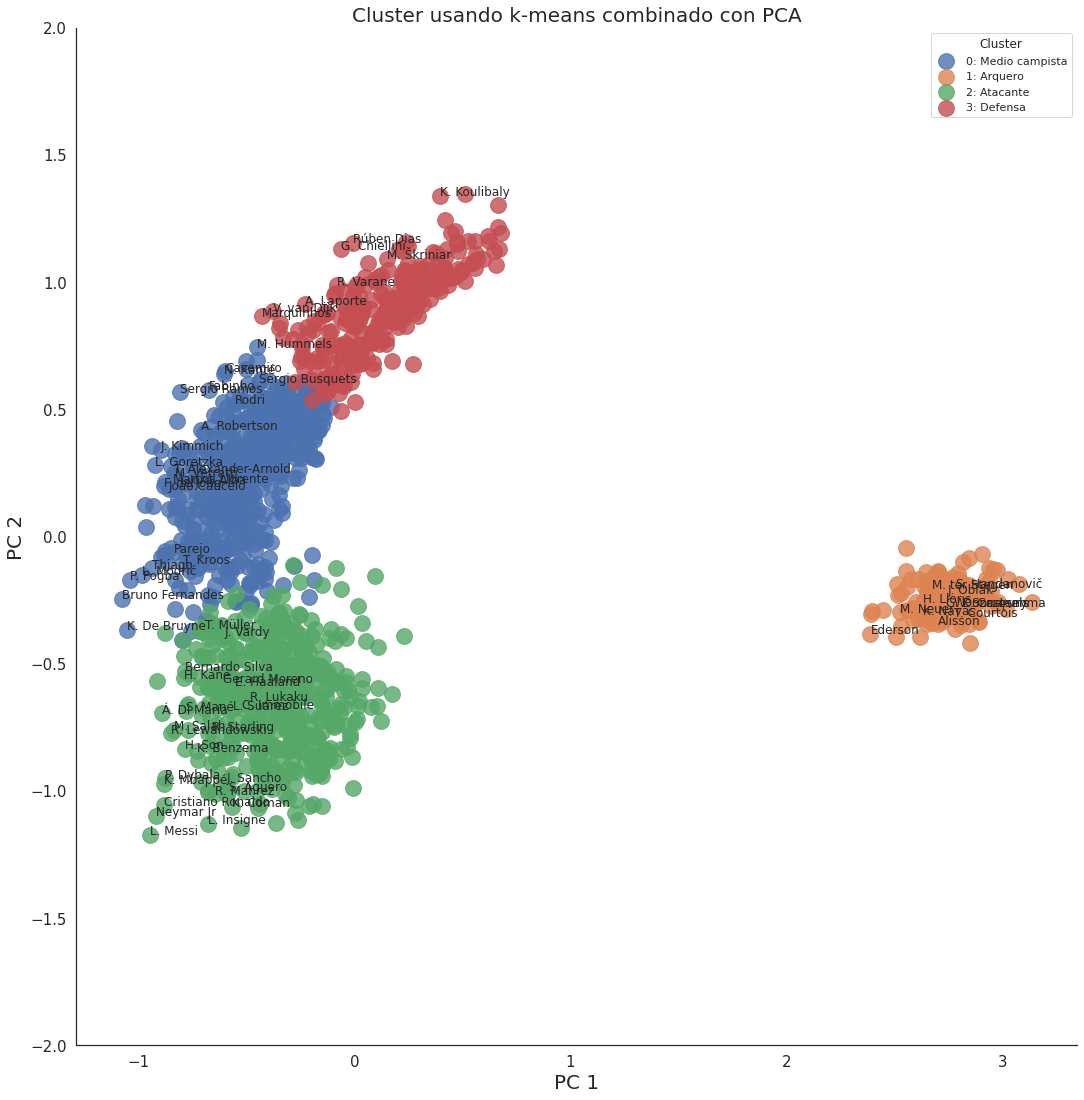

In [75]:
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='km_labels', data = df_c_KM, legend=True,
fit_reg=False, size = 15, scatter_kws={"s": 250}, facet_kws={'legend_out': False})
texts = []
for x, y, s, c in zip(df_c_KM.x, df_c_KM.y, df_c_KM.short_name,df_c_KM.bool_crack):
    if c:
        texts.append(plt.text(x, y, s))


ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.title('Cluster usando k-means combinado con PCA', fontsize = 20)

# title
new_title = 'Cluster'
ax._legend.set_title(new_title)
# replace labels
new_labels = ['0: Medio campista','1: Arquero','2: Atacante', '3: Defensa']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)
plt.show()

# Identificamos 5 jugadores clasificados por km_labels, asi como sus posiciones en la cancha.

In [76]:

for cluster in df_c_KM['km_labels'].unique():
    print(f"Num Cluster: {cluster} \n {'-'*90}\n",
          f"Jugadores: {df_c_KM[df_c_KM['km_labels']==cluster]['short_name'].values[:5]}\n {'-'*90}\n",
          f"Posición en la cancha: {df_c_KM[df_c_KM['km_labels']==cluster]['Main_Position'].values[:5]}\n {'-'*90}\n"       
          ) 

Num Cluster: 2 
 ------------------------------------------------------------------------------------------
 Jugadores: ['L. Messi' 'R. Lewandowski' 'Cristiano Ronaldo' 'Neymar Jr' 'K. Mbappé']
 ------------------------------------------------------------------------------------------
 Posición en la cancha: ['Atacante' 'Atacante' 'Atacante' 'Atacante' 'Atacante']
 ------------------------------------------------------------------------------------------

Num Cluster: 0 
 ------------------------------------------------------------------------------------------
 Jugadores: ['K. De Bruyne' 'N. Kanté' 'Casemiro' 'J. Kimmich' 'Sergio Ramos']
 ------------------------------------------------------------------------------------------
 Posición en la cancha: ['Medio campista' 'Medio campista' 'Medio campista' 'Medio campista'
 'Defensa']
 ------------------------------------------------------------------------------------------

Num Cluster: 1 
 ----------------------------------------------

# Clustering-Mean-Shift
- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media).

In [84]:
ms = MeanShift(bandwidth=7, bin_seeding=True)
ms.fit(df_train)
clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)



bool_crack=df_train["overall"] > 85
bool_no_crack=df_train["overall"]<86


# Habilidades seleccionadas
skill_1= 'defending_standing_tackle'
skill_2= 'attacking_finishing'


data=[]
MeanShift_clusters = go.Scatter(x=df_train[skill_1], y=df_train[skill_2],
                           mode='markers',
                        text=df_clust.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_train.loc[bool_crack,skill_1], y=df_train.loc[bool_crack,skill_2],name='Top players',
                      text=df_clust.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab
fig.show(renderer="colab")

print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Cantidad de clusters encontrados por Mean Shift : 1


Mean shift encontró  1 clusters, según los hiperparámetros elegidos


In [85]:
df_clus_MS=df_clust.copy()
df_clus_MS['MeanShift'] = ms.labels_ #clusters
df_clus_MS[['Main_Position','short_name']]=df2[['Main_Position','short_name']]
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró: ', max(ms.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró:  1 clusters, nosotros forzamos la cantidad


# Clustering Jerárquico
- Ahora agruparemos los registros de la base de datos a partir de sus caracteristicas, buscando similitudes. Esta vez exploraremos usando tecnicas jerárquicas. Determinamos usando un dendograma la cantidad de agrupamientos a usar.
- Usamos el conjunto de datos normalizado, para evitar sesgos por las unidades usadas en la base de datos.

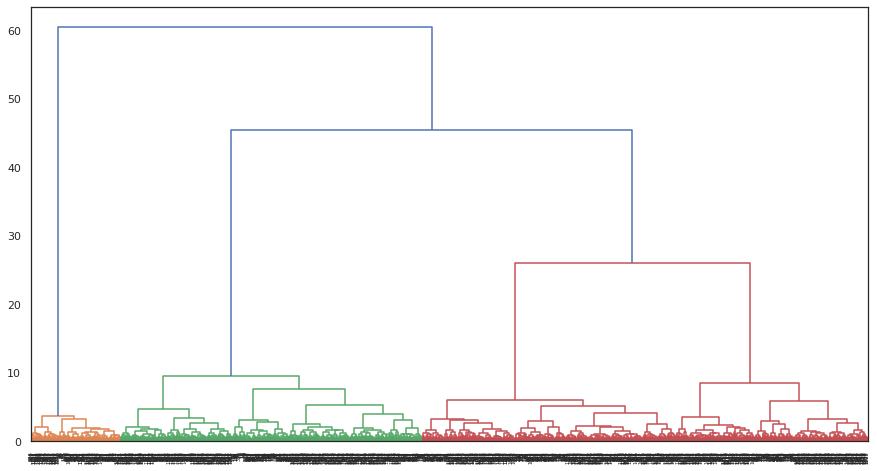

In [89]:
# Ajuste de los datos al algoritmo jerarquico
dm = linkage(df_train, method='ward')

# Create a dendrogram
plt.figure(figsize=(15,8))
dendr = dendrogram(dm)
plt.show()

Del anterior se pueden extraer 4 clusters...

In [95]:
# Se identifican 4 clusters
df_hier = df_train.copy()
df_hier['Cluster'] = fcluster(dm, 4, criterion='maxclust')
df_hier[['Main_Position','short_name']]=df2[['Main_Position','short_name']]

In [96]:
# Agrupamos los clusters segun la media de cada una de las variables
df_hier.groupby('Cluster').mean()

,overall,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,labels
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.211690,0.000000,0.084506,0.089243,0.092579,0.283478,0.104084,0.094528,0.085500,0.080655,0.264371,0.173439,0.353911,0.360155,0.377325,0.485669,0.306352,0.435032,0.552150,0.207875,0.592743,0.113022,0.223544,0.146190,0.095057,0.462390,0.154938,0.462263,0.121612,0.091542,0.077191,0.872397,0.832413,0.788059,0.853786,0.900622,1.0
2,0.184492,0.667614,0.727097,0.798822,0.647947,0.787559,0.792424,0.821410,0.760361,0.662813,0.682847,0.820794,0.763525,0.754004,0.774571,0.539194,0.721907,0.763745,0.569454,0.698126,0.591655,0.781397,0.612746,0.382393,0.812994,0.762897,0.728505,0.742009,0.390636,0.370595,0.307134,0.094356,0.095244,0.094385,0.093140,0.095730,2.0
3,0.187093,0.550226,0.756811,0.657612,0.660743,0.829258,0.666923,0.783373,0.744948,0.656097,0.793746,0.808075,0.661486,0.653770,0.696674,0.550665,0.694601,0.726185,0.598476,0.788631,0.634038,0.743516,0.776632,0.812016,0.735769,0.764270,0.626996,0.745261,0.767704,0.797575,0.765156,0.096254,0.092601,0.093369,0.093253,0.096296,3.0
4,0.146709,0.335565,0.571636,0.410384,0.783465,0.750072,0.412850,0.628991,0.478046,0.382475,0.696208,0.705768,0.605884,0.660677,0.551389,0.500083,0.521412,0.521386,0.714658,0.712662,0.744724,0.466336,0.810420,0.845346,0.503753,0.560906,0.439616,0.682363,0.827450,0.841224,0.827239,0.095506,0.092989,0.094388,0.092295,0.096219,4.0


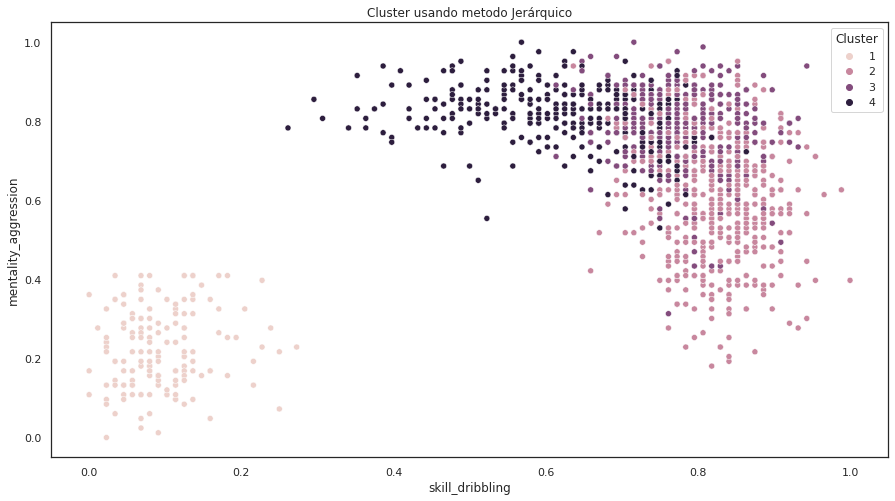

In [116]:
# Visualizamos dos variables 
plt.figure(figsize=(15,8))
sns.scatterplot(x='skill_dribbling', y='mentality_aggression', hue='Cluster', data=df_hier)
plt.title('Cluster usando metodo Jerárquico')
plt.show()

# Identificamos 5 jugadores por cluster, asi como sus posiciones en la cancha - Método Jerárquico:

In [115]:

for cluster in df_hier['Cluster'].unique():
    print(f"Num Cluster: {cluster} \n {'-'*90}\n",
          f"Jugadores: {df_hier[df_hier['Cluster']==cluster]['short_name'].values[:5]}\n {'-'*90}\n",
          f"Posición en la cancha: {df_hier[df_hier['Cluster']==cluster]['Main_Position'].values[:5]}\n {'-'*90}\n"       
          )

Num Cluster: 2 
 ------------------------------------------------------------------------------------------
 Jugadores: ['L. Messi' 'R. Lewandowski' 'Cristiano Ronaldo' 'Neymar Jr'
 'K. De Bruyne']
 ------------------------------------------------------------------------------------------
 Posición en la cancha: ['Atacante' 'Atacante' 'Atacante' 'Atacante' 'Medio campista']
 ------------------------------------------------------------------------------------------

Num Cluster: 1 
 ------------------------------------------------------------------------------------------
 Jugadores: ['J. Oblak' 'M. Neuer' 'M. ter Stegen' 'T. Courtois' 'Ederson']
 ------------------------------------------------------------------------------------------
 Posición en la cancha: ['Arquero' 'Arquero' 'Arquero' 'Arquero' 'Arquero']
 ------------------------------------------------------------------------------------------

Num Cluster: 3 
 --------------------------------------------------------------------

# Evaluación - Conclusiones:
Se identifican en general 4 grupos:

**- Cluster 0 -> Arquero:** es aquel jugador que, en el fútbol, ocupa el puesto específico que consiste en guardar la portería, constituyendo el último defensor del equipo. En el desempeño de su tarea le está permitido, dentro de los límites del área de penalti, jugar el balón con las manos. En este grupo se diferenciaron: Keylor Antonio Navas Gamboa, Manuel Peter Neuer, Ederson Moraes, Alisson Becker. ***Es el grupo que mejor se desmarca del resto de jugadores.***

**- Cluster 2 -> Atacante/delantero interior:** es un jugador de un equipo de fútbol que se destaca en la posición de ataque, la más cercana a la portería del equipo rival, y es por ello el principal responsable de marcar los goles. En este grupo se diferenciaron: Romelu Lukaku, Neymar da Silva Santos Júnior, Kylian Mbappé, Lionel Messi. Este grupo se confunde con medio campista.

**- Cluster 1 -> Mediocampista /volante ofensivo:** es el futbolista que juega en el centro del campo o por los costados y que se ubica entre los defensores y el delantero. Sus funciones son variadas y dependen de mucho de las características del centrocampista. En este grupo se diferenciaron: Marcos Llorente, Paul Pogba, Toni Kroos.

**- Cluster 3 -> Defensa:**  es un jugador del campo que tiene como rol principal impedir que los adversarios puedan llegar a la portería propia y marcar goles ante el portero. En este grupo se diferenciaron: Rúben Dias, Giorgio Chiellini, Kalidou Koulibaly.


# Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?
Si, este se realizo para que las medidas sean comparables, evitar sesgos (ya que los datos en crudos pueden presentarlos). Evitamos así que los datos dependan de una característica puntual.